In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from scipy.stats import variation

# Variance of Fluctuations 
From expansion of the master equations we get the FPE. Explains the macroscopic behaviour with the fluctuations around the mean. From here, the change in variance can be described as (since $\frac{d<\xi>}{dt} = 0 $)  $$\frac{d <\xi^2>_t}{dt} = 2(\beta - \gamma - 2 \beta \phi) <\xi ^2>_t +\beta (1-\phi) \phi + \gamma \phi$$ 
Where,$\phi = \frac{<I>}{N}$ and $\frac{d\phi}{dt} = \phi (-\beta \phi + \beta - \gamma)$

$$\beta(t) = (1-pt)\beta_0$$

Compare this to numerical solutions - simulate the system multiple times and plot the variance between these simulations at each time point. 

In [3]:
def gillespieSIS(initial, beta0,p, gamma, max_time):
    T = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    T.append(0)
    t = 0
    ind = 0
    while t <max_time:
        betat = (1-p*t)*beta0
#         print(betat)
        state = np.zeros(shape= (2,2))
        R1 = betat*(pop[ind][0])*(pop[ind][1])/N
        state[:,0] = [-1, 1]
        R2 = gamma*(pop[ind][1])
        state[:,1] = [1, -1]
        rate = [R1, R2]
        Rtotal = R1+R2
        if Rtotal >0:
            delta_t= -np.log(np.random.uniform(0,1))/Rtotal

            P = np.random.uniform(0,1)*Rtotal
            t =t+ delta_t
            event = np.min(np.where(P<=np.cumsum(rate)))
            T.append(t)
            pop.append(pop[ind]+state[:,event])
        else: 
            t = max_time
#             year = year +1 
#             events.append(-1)
            T.append(t)
            pop.append(pop[ind])
        ind=ind+1
    return T, np.array(pop)

In [4]:
def gillsteps(G):
    t = G[0]
    s = G[1][:,0]
    i = G[1][:,1]
    stept = []
    steps = []
    stepi = []
    for ind, x in enumerate(t):
        if ind<len(t)-1:
            steps.append((s[ind], s[ind]))
            stepi.append((i[ind], i[ind]))
            stept.append((t[ind], t[ind+1]))
        else:
            steps.append((s[ind], s[ind]))
            stepi.append((i[ind], i[ind]))
            stept.append((t[ind], t[ind]))
    steps = np.array(steps).flatten()
    stepi = np.array(stepi).flatten()
    stept = np.array(stept).flatten()
    return stept, steps, stepi

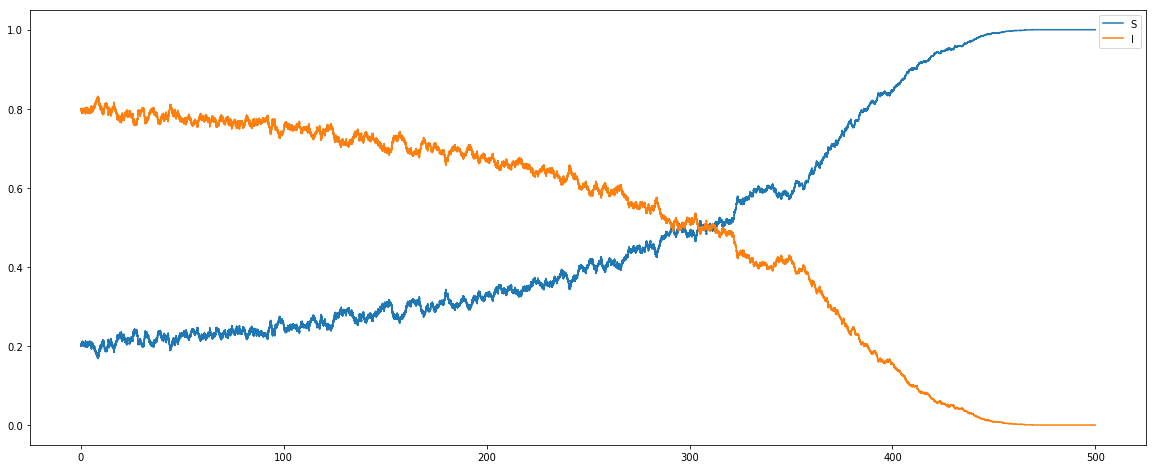

In [5]:
N = 2000
T = 500
G = gillespieSIS([N-0.8*N,0.8*N], 1,1/500, 0.2, T)


G[0][-1]
plt.figure(figsize = (20,8))
plt.plot(gillsteps(G)[0], gillsteps(G)[1]/N, label = 'S')
plt.plot(gillsteps(G)[0], gillsteps(G)[2]/N, label = 'I')
plt.legend()

In [6]:
G[0][-1]


500

In [7]:
inter_t = np.arange(0, round(max(gillsteps(G)[0])) +1 , 1) #interpolate to daily steps
inter_inf = np.interp(inter_t, gillsteps(G)[0],gillsteps(G)[2])

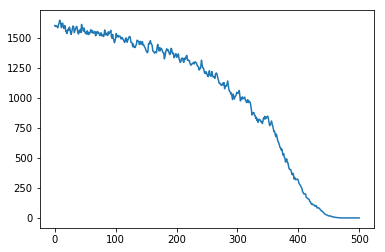

In [8]:
plt.plot(inter_t, inter_inf)

In [9]:
β_0 =1
p=1/500
γ = 0.2
def dvardt(X, tt ):
#     print(1-p*tt)
    return [X[0]*(-β_0*(1-p*tt)*X[0]+β_0*(1-p*tt)-γ),
            2*(β_0*(1-p*tt) - γ -2*β_0*(1-p*tt)*X[0])*X[1]+ β_0*(1-p*tt)*(1-X[0])*X[0]+γ*X[0]]

ts = np.linspace(0, T, 1000)
P = odeint(dvardt, [0.8,0.2], ts)

In [10]:
T = 500
SIM = 50
simulations = np.zeros(shape=(SIM, T))
for k in range(SIM):
    print(k)
    G = gillespieSIS([N-0.8*N,0.8*N], β_0,p, γ, T)
    inter_t = np.arange(0, round(max(gillsteps(G)[0])) +1 , 1) #interpolate to daily steps
    inter_inf = np.interp(inter_t, gillsteps(G)[0],gillsteps(G)[2])
    if round(max(gillsteps(G)[0]))<T:
        simulations[k,: ] = np.concatenate([inter_inf,np.zeros(T - len(inter_inf))])
    else:
        simulations[k,:] = inter_inf[:T]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [14]:
# np.var(simulations[:,1]/N)
t_star = (1/p)*(1- (γ/β_0))
simulations[0:k,:]
# P[:,]
1/0.02


50.0

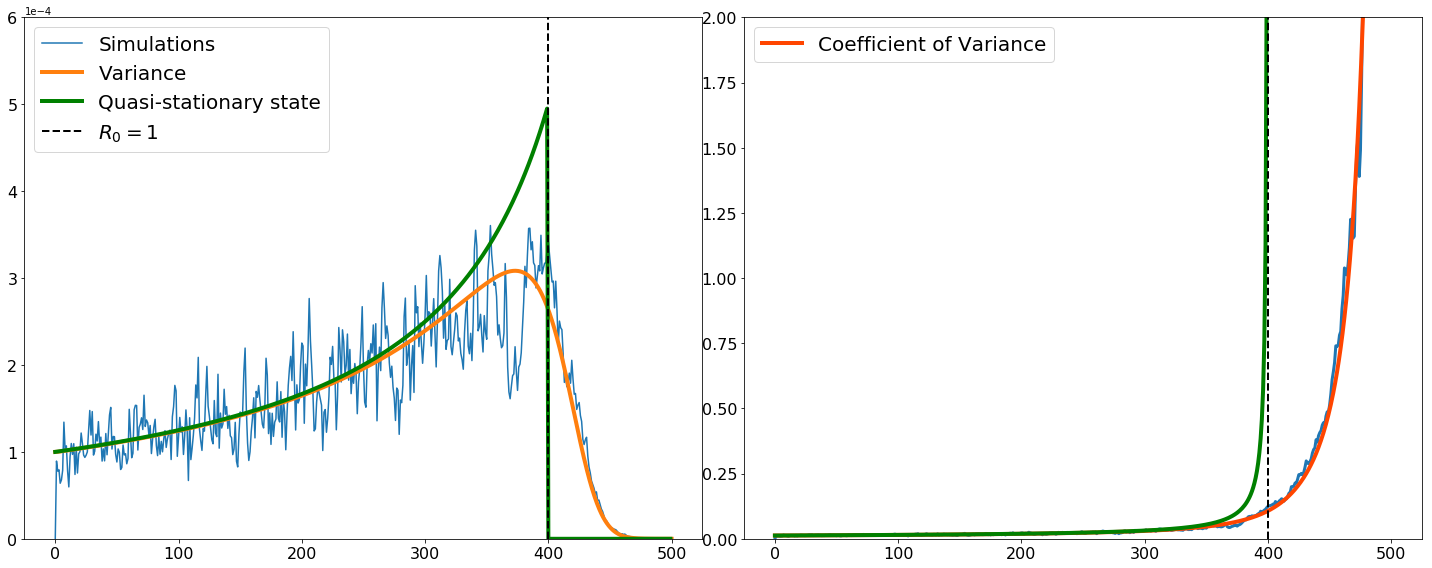

In [53]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
a= plt.plot(range(T), np.var(simulations[0:k,:]/N, axis = 0),label = 'Simulations')
b =plt.plot(ts, P[:,1]/N, linewidth = 4, label = 'Variance')
c = plt.plot(range(T), np.maximum(qu,0),linewidth = 4, c= 'green', label = 'Quasi-stationary state')
e = plt.plot([t_star, t_star],[0,0.0006] , '--',c = 'k', linewidth =2, label = '$R_0 = 1$')
plt.tight_layout()
plt.ylim([0,0.0006])
# d = plt.plot([3,3],[2,2],'', c= 'orangered', label ='Coefficient of Variation')
# plt.ylabel('Variance', fontsize = 20)
# plt.legend(fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend( fontsize = 20)
# plt.xlim([0,60])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.subplot(1,2,2)
plt.plot(range(T), variation(simulations[0:k,:], axis = 0), linewidth = 3)

d = plt.plot(ts, np.sqrt(P[:,1]/N)/P[:,0],linewidth = 4, c= 'orangered', label =  'Coefficient of Variance')
plt.plot(range(T), quasi_cov, linewidth =4, c='green')
plt.plot([t_star, t_star],[0,12] , '--',c='k', linewidth = 2)
plt.tight_layout()
# plt.ylabel('Coefficient of Variation', fontsize = 16)
plt.legend(fontsize = 20
          )
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
# plt.xlim([0,500])
plt.ylim([0,2])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

NameError: name 'quasi_cov' is not defined

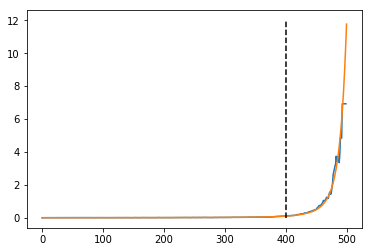

In [16]:
# plt.plot(range(70), np.var(simulations[0:k,:]/N, axis = 0)[:70])
plt.plot(range(500), variation(simulations[0:k,:]/N, axis = 0), label = 'Simulations')

plt.plot(ts, np.sqrt(P[:,1]/N)/P[:,0], label =  'CV')

plt.plot([t_star, t_star],[0,12] , '--',c='k', label = '$R_0 = 1$')
plt.plot(range(500), quasi_cov,'--', label = 'Quasi-startionary')

plt.tight_layout()
plt.ylabel('Coefficient of Variation', fontsize = 16)
plt.legend(fontsize = 16)
# plt.xlim([0,500])
plt.ylim([0,2])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

In [18]:
variation(simulations[0:k,:]/N, axis = 0)
abs(-2.1)
# quasi_cov
def integrand(x, q, lamb):
    return q/(x**2 + lamb**2)
#     return (alpha + D22*(x**2))/((x**2-dd)**2 + (tt**2)*(x**2))
from scipy.integrate import quad

In [32]:
quasi = []
qu = []
quasi_cov = []
for k in range(500):
    b = β_0*(1-p*k)
    star = 1- (γ/b)
    lam = b - 2*b*star - γ
    Q = b*(1-star)*star + γ*star
    var = (1/(2*np.pi))*quad(integrand, -np.inf, np.inf, args=(Q,lam))[0]
#     print(k, b)
    qu.append(var/N)
    quasi.append(Q/(2*abs(lam)))
    quasi_cov.append(np.sqrt(var/N)/star)

/home/emma/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [50]:
quasi_cov

[0.5590169943749473,
 0.5598573409445784,
 0.5607013468447589,
 0.5615490380253892,
 0.5624004406899012,
 0.5632555812984047,
 0.5641144865708851,
 0.5649771834904459,
 0.5658436993066029,
 0.5667140615386276,
 0.56758829797894,
 0.5684664366965548,
 0.5693485060405805,
 0.5702345346437704,
 0.5711245514261296,
 0.5720185855985778,
 0.5729166666666666,
 0.573818824434358,
 0.5747250890078573,
 0.5756354907995094,
 0.5765500605317538,
 0.5774688292411423,
 0.5783918282824192,
 0.5793190893326672,
 0.5802506443955168,
 0.5811865258054232,
 0.582126766232012,
 0.583071398684492,
 0.5840204565161407,
 0.5849739734288602,
 0.5859319834778055,
 0.58689452107609,
 0.5878616209995635,
 0.5888333183916707,
 0.5898096487683853,
 0.5907906480232282,
 0.5917763524323632,
 0.5927667986597799,
 0.59376202376256,
 0.5947620651962297,
 0.5957669608202003,
 0.5967767489033023,
 0.597791468129405,
 0.5988111576031359,
 0.5998358568556916,
 0.6008656058507476,
 0.6019004449904666,
 0.602940415121608,
 0.

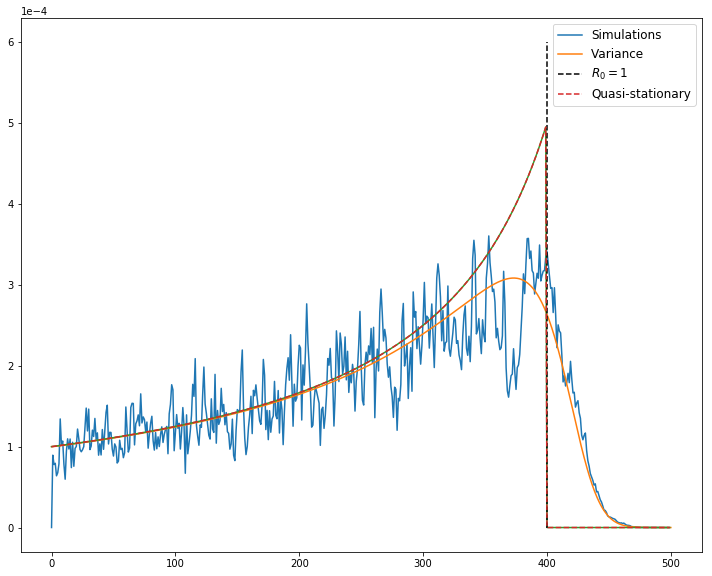

In [21]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(range(T), np.var(simulations[0:k,:]/N, axis = 0), label = 'Simulations')
plt.plot(ts, P[:,1]/N, label = 'Variance')
plt.plot(range(T), np.maximum(qu,0))
plt.plot([t_star, t_star],[0,0.0006] , '--', c= 'k', label = '$R_0 = 1$')
plt.tight_layout()
# plt.ylabel('Variance', fontsize = 20)
# plt.xlim([0,60])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.plot(range(500), np.maximum(quasi,0)/N,'--', label ='Quasi-stationary')
plt.legend(fontsize = 12)


In [34]:
P[:,1]/N

array([1.00000000e-04, 1.00010804e-04, 1.00043454e-04, 1.00094942e-04,
       1.00160958e-04, 1.00237602e-04, 1.00321804e-04, 1.00411288e-04,
       1.00504463e-04, 1.00600219e-04, 1.00697790e-04, 1.00796648e-04,
       1.00896442e-04, 1.00996934e-04, 1.01097961e-04, 1.01199417e-04,
       1.01301229e-04, 1.01403346e-04, 1.01505738e-04, 1.01608382e-04,
       1.01711264e-04, 1.01814376e-04, 1.01917710e-04, 1.02021262e-04,
       1.02125029e-04, 1.02229010e-04, 1.02333204e-04, 1.02437612e-04,
       1.02542234e-04, 1.02647070e-04, 1.02752119e-04, 1.02857381e-04,
       1.02962857e-04, 1.03068551e-04, 1.03174459e-04, 1.03280582e-04,
       1.03386923e-04, 1.03493481e-04, 1.03600257e-04, 1.03707252e-04,
       1.03814467e-04, 1.03921901e-04, 1.04029555e-04, 1.04137434e-04,
       1.04245533e-04, 1.04353854e-04, 1.04462399e-04, 1.04571168e-04,
       1.04680163e-04, 1.04789383e-04, 1.04898830e-04, 1.05008504e-04,
       1.05118406e-04, 1.05228537e-04, 1.05338898e-04, 1.05449488e-04,
      